# New Zeeland Crash Predictions

#### Samantha Petrovich

### Summary of Project
In this notebook I will be examining the most likely factors that contribute to a car crash and what can cause a fatal crash. The data in this project is extracted from the New Zeeland Transport Agency website Crash Analysis System or CAS data. Below is a quote directly from the website that describes what the data entails. 

    "It is updated on a quarterly basis. CAS records all traffic crashes as reported to the Transport Agency by the NZ Police. Not all crashes are reported to the NZ Police. The level of reporting increases with the severity of the crash. 

    Due to the nature of non-fatal crashes it is believed that these are under-reported. CAS covers crashes on all New Zealand roadways or places where the public have legal access with a motor vehicle. 

    The Transport Agency's target is to process all fatal crashes within one working day of the crash report being received. This target continues to be achieved. The Transport Agency’s target is to process all injury crashes (serious and minor injury) within four weeks of the crash report being received.

    Data is currently available from 1 January 2000 and is updated monthly. The dataset includes crash variables confirmed as non-personal data."(Crash Analysis System (CAS) Data.).

Driving skills vary greatly from region to region around the world. There are different regulations in New Zeeland than in other countries, so the models and statistics in this project can't fully describe what influences drivers the most in a crash in different countries. 

### Importing important libraries

In [1]:
import pandas as pd #Import Pandas
import matplotlib.pyplot as plt #Import Matplotlib
import numpy as np #Import numpy
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

## Getting the data and Cleaning it up

This dataset has many columns with empty numbers. There are also columns that I am not going to use at first, but may get to later. Cleaning up the data and narrowing down what I am working with will benifit me and the models that I will be trying to make. 

In [2]:
pd.set_option('display.max_columns', 100)
CAS_df = pd.read_csv('CAD.csv')
CAS_df.head()

,X,Y,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,crashDirectionDescription,crashFinancialYear,crashLocation1,crashLocation2,crashRoadSideRoad,crashSeverity,crashSHDescription,crashYear,debris,directionRoleDescription,ditch,fatalCount,fence,flatHill,guardRail,holiday,houseOrBuilding,intersection,kerb,light,meshblockId,minorInjuryCount,moped,motorcycle,NumberOfLanes,objectThrownOrDropped,otherObject,otherVehicleType,overBank,parkedVehicle,pedestrian,phoneBoxEtc,postOrPole,region,roadCharacter,roadLane,roadSurface,roadworks,schoolBus,seriousInjuryCount,slipOrFlood,speedLimit,strayAnimal,streetLight,suv,taxi,temporarySpeedLimit,tlaId,tlaName,trafficControl,trafficIsland,trafficSign,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB
0,1750919.00,5.427734e+06,1,NaN,576700.0,0.0,0.0,0.0,2.0,1.0,South,2009,MAIDA VALE ROAD,THE CRESCENT,NaN,Non-Injury Crash,No,2008,0.0,North,0.0,0.0,0.0,Hill Road,0.0,NaN,0.0,NaN,0.0,Overcast,2186500.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,Wellington Region,Nil,2-way,Sealed,0.0,0.0,0.0,0.0,50.0,0.0,Null,0.0,0.0,NaN,47.0,Wellington City,Nil,0.0,0.0,0.0,0.0,0.0,0.0,Urban,0.0,0.0,0.0,Fine,Null
1,1728170.00,6.006564e+06,2,NaN,501815.0,0.0,0.0,0.0,0.0,0.0,North,2008,SH 1N,PIROA STM BR,NaN,Minor Crash,Yes,2008,0.0,South,1.0,0.0,0.0,Hill Road,0.0,NaN,0.0,NaN,0.0,Bright sun,81600.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,Northland Region,Nil,2-way,Sealed,0.0,0.0,0.0,0.0,100.0,0.0,None,0.0,0.0,NaN,2.0,Whangarei District,Nil,0.0,0.0,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Fine,Null
2,1767790.94,5.905093e+06,3,NaN,523722.0,0.0,NaN,0.0,1.0,NaN,East,2019,TE IRIRANGI DR,TE IRIRANGI DRIVE OFF RAMP,NaN,Non-Injury Crash,No,2018,NaN,East,NaN,0.0,NaN,Flat,NaN,NaN,NaN,NaN,NaN,Bright sun,715701.0,0.0,0.0,0.0,2.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Auckland Region,Motorway ramp,1-way,Sealed,NaN,0.0,0.0,NaN,60.0,NaN,Off,0.0,0.0,NaN,76.0,Auckland,Unknown,NaN,NaN,NaN,NaN,0.0,0.0,Urban,1.0,NaN,NaN,Fine,Null
3,1681006.00,6.024878e+06,4,NaN,504502.0,1.0,NaN,0.0,1.0,NaN,Null,2008,SH 14,AWAKINO POINT NORTH ROAD,NaN,Minor Crash,Yes,2007,NaN,North,NaN,0.0,NaN,Flat,NaN,NaN,NaN,NaN,NaN,Overcast,119800.0,1.0,0.0,0.0,2.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Northland Region,Nil,2-way,Sealed,NaN,0.0,0.0,NaN,100.0,NaN,None,0.0,0.0,NaN,3.0,Kaipara District,Give way,NaN,NaN,NaN,NaN,0.0,0.0,Open,0.0,NaN,NaN,Fine,Null
4,1756984.00,5.918844e+06,5,NaN,514301.0,0.0,NaN,1.0,1.0,NaN,North,2002,SYMONDS ST,MOUNT EDEN ROAD,NaN,Non-Injury Crash,No,2001,NaN,North,NaN,0.0,NaN,Flat,NaN,NaN,NaN,NaN,NaN,Bright sun,441502.0,0.0,0.0,0.0,2.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Auckland Region,Nil,2-way,Sealed,NaN,0.0,0.0,NaN,40.0,NaN,Off,0.0,0.0,NaN,76.0,Auckland,Nil,NaN,NaN,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null


Here I am trying to reduce and drop columns that I do not need to look at right now and reduce the variables that are invloved in a fatal crash. If I have time I will go back and add these columns back in and see if they have any significant effect on whether or not they cause a crash. I am also getting rid of columns that have a lot of missing information.

In [3]:
new_CAS_df = CAS_df.drop(columns = ['X','Y','advisorySpeed','bridge','cliffBank','crashLocation1','crashLocation2'
                                    ,'crashRoadSideRoad','debris','ditch','fence','guardRail','holiday','houseOrBuilding',
                                   'intersection','kerb','objectThrownOrDropped','otherObject','otherVehicleType',
                                    'overBank', 'parkedVehicle', 'pedestrian','phoneBoxEtc','postOrPole','roadCharacter'
                                   ,'roadworks','slipOrFlood','strayAnimal','temporarySpeedLimit','trafficControl',
                                    'trafficIsland','trafficSign','train','tree','unknownVehicleType','vehicle','waterRiver'
                                   ,'OBJECTID','areaUnitID','region','tlaName',
                                 'bicycle','bus','carStationWagon','crashFinancialYear','meshblockId','moped','motorcycle',
                                'schoolBus','suv','taxi','tlaId','truck','vanOrUtility'])

In [4]:
new_CAS_df.head()

,crashDirectionDescription,crashSeverity,crashSHDescription,crashYear,directionRoleDescription,fatalCount,flatHill,light,minorInjuryCount,NumberOfLanes,roadLane,roadSurface,seriousInjuryCount,speedLimit,streetLight,urban,weatherA,weatherB
0,South,Non-Injury Crash,No,2008,North,0.0,Hill Road,Overcast,0.0,2.0,2-way,Sealed,0.0,50.0,Null,Urban,Fine,Null
1,North,Minor Crash,Yes,2008,South,0.0,Hill Road,Bright sun,1.0,3.0,2-way,Sealed,0.0,100.0,None,Open,Fine,Null
2,East,Non-Injury Crash,No,2018,East,0.0,Flat,Bright sun,0.0,2.0,1-way,Sealed,0.0,60.0,Off,Urban,Fine,Null
3,Null,Minor Crash,Yes,2007,North,0.0,Flat,Overcast,1.0,2.0,2-way,Sealed,0.0,100.0,None,Open,Fine,Null
4,North,Non-Injury Crash,No,2001,North,0.0,Flat,Bright sun,0.0,2.0,2-way,Sealed,0.0,40.0,Off,Urban,Fine,Null


In [5]:
Crash_df = new_CAS_df.dropna()
Crash_df.head()

,crashDirectionDescription,crashSeverity,crashSHDescription,crashYear,directionRoleDescription,fatalCount,flatHill,light,minorInjuryCount,NumberOfLanes,roadLane,roadSurface,seriousInjuryCount,speedLimit,streetLight,urban,weatherA,weatherB
0,South,Non-Injury Crash,No,2008,North,0.0,Hill Road,Overcast,0.0,2.0,2-way,Sealed,0.0,50.0,Null,Urban,Fine,Null
1,North,Minor Crash,Yes,2008,South,0.0,Hill Road,Bright sun,1.0,3.0,2-way,Sealed,0.0,100.0,None,Open,Fine,Null
2,East,Non-Injury Crash,No,2018,East,0.0,Flat,Bright sun,0.0,2.0,1-way,Sealed,0.0,60.0,Off,Urban,Fine,Null
3,Null,Minor Crash,Yes,2007,North,0.0,Flat,Overcast,1.0,2.0,2-way,Sealed,0.0,100.0,None,Open,Fine,Null
4,North,Non-Injury Crash,No,2001,North,0.0,Flat,Bright sun,0.0,2.0,2-way,Sealed,0.0,40.0,Off,Urban,Fine,Null


## Examining and Exploing the Data

In this section I will be using seaborn to make some histograms and graphs to look for correlations between fatal crashes and different variables. For example, I can compare the frequency of fatal crashes with the type of weather that was present during that crash. This type of analysis can tell me whether or not there is a possible correlation between the type of weather and fatal crashes. 

Right below I am describing the data of each column, that has numbers, and a histogram of those columns. This will tell me what kind of numbers I am dealing with in each numerical column and if there are any outliers.

           crashYear     fatalCount  minorInjuryCount  NumberOfLanes  \
count  731823.000000  731823.000000     731823.000000  731823.000000   
mean     2009.551363       0.010302          0.311041       2.348390   
std         5.870652       0.116399          0.640381       0.955085   
min      2000.000000       0.000000          0.000000       0.000000   
25%      2005.000000       0.000000          0.000000       2.000000   
50%      2009.000000       0.000000          0.000000       2.000000   
75%      2015.000000       0.000000          0.000000       2.000000   
max      2020.000000       9.000000         34.000000       9.000000   

       seriousInjuryCount     speedLimit  
count       731823.000000  731823.000000  
mean             0.067626      65.831379  
std              0.299374      22.451322  
min              0.000000       5.000000  
25%              0.000000      50.000000  
50%              0.000000      50.000000  
75%              0.000000     100.000000  
max    

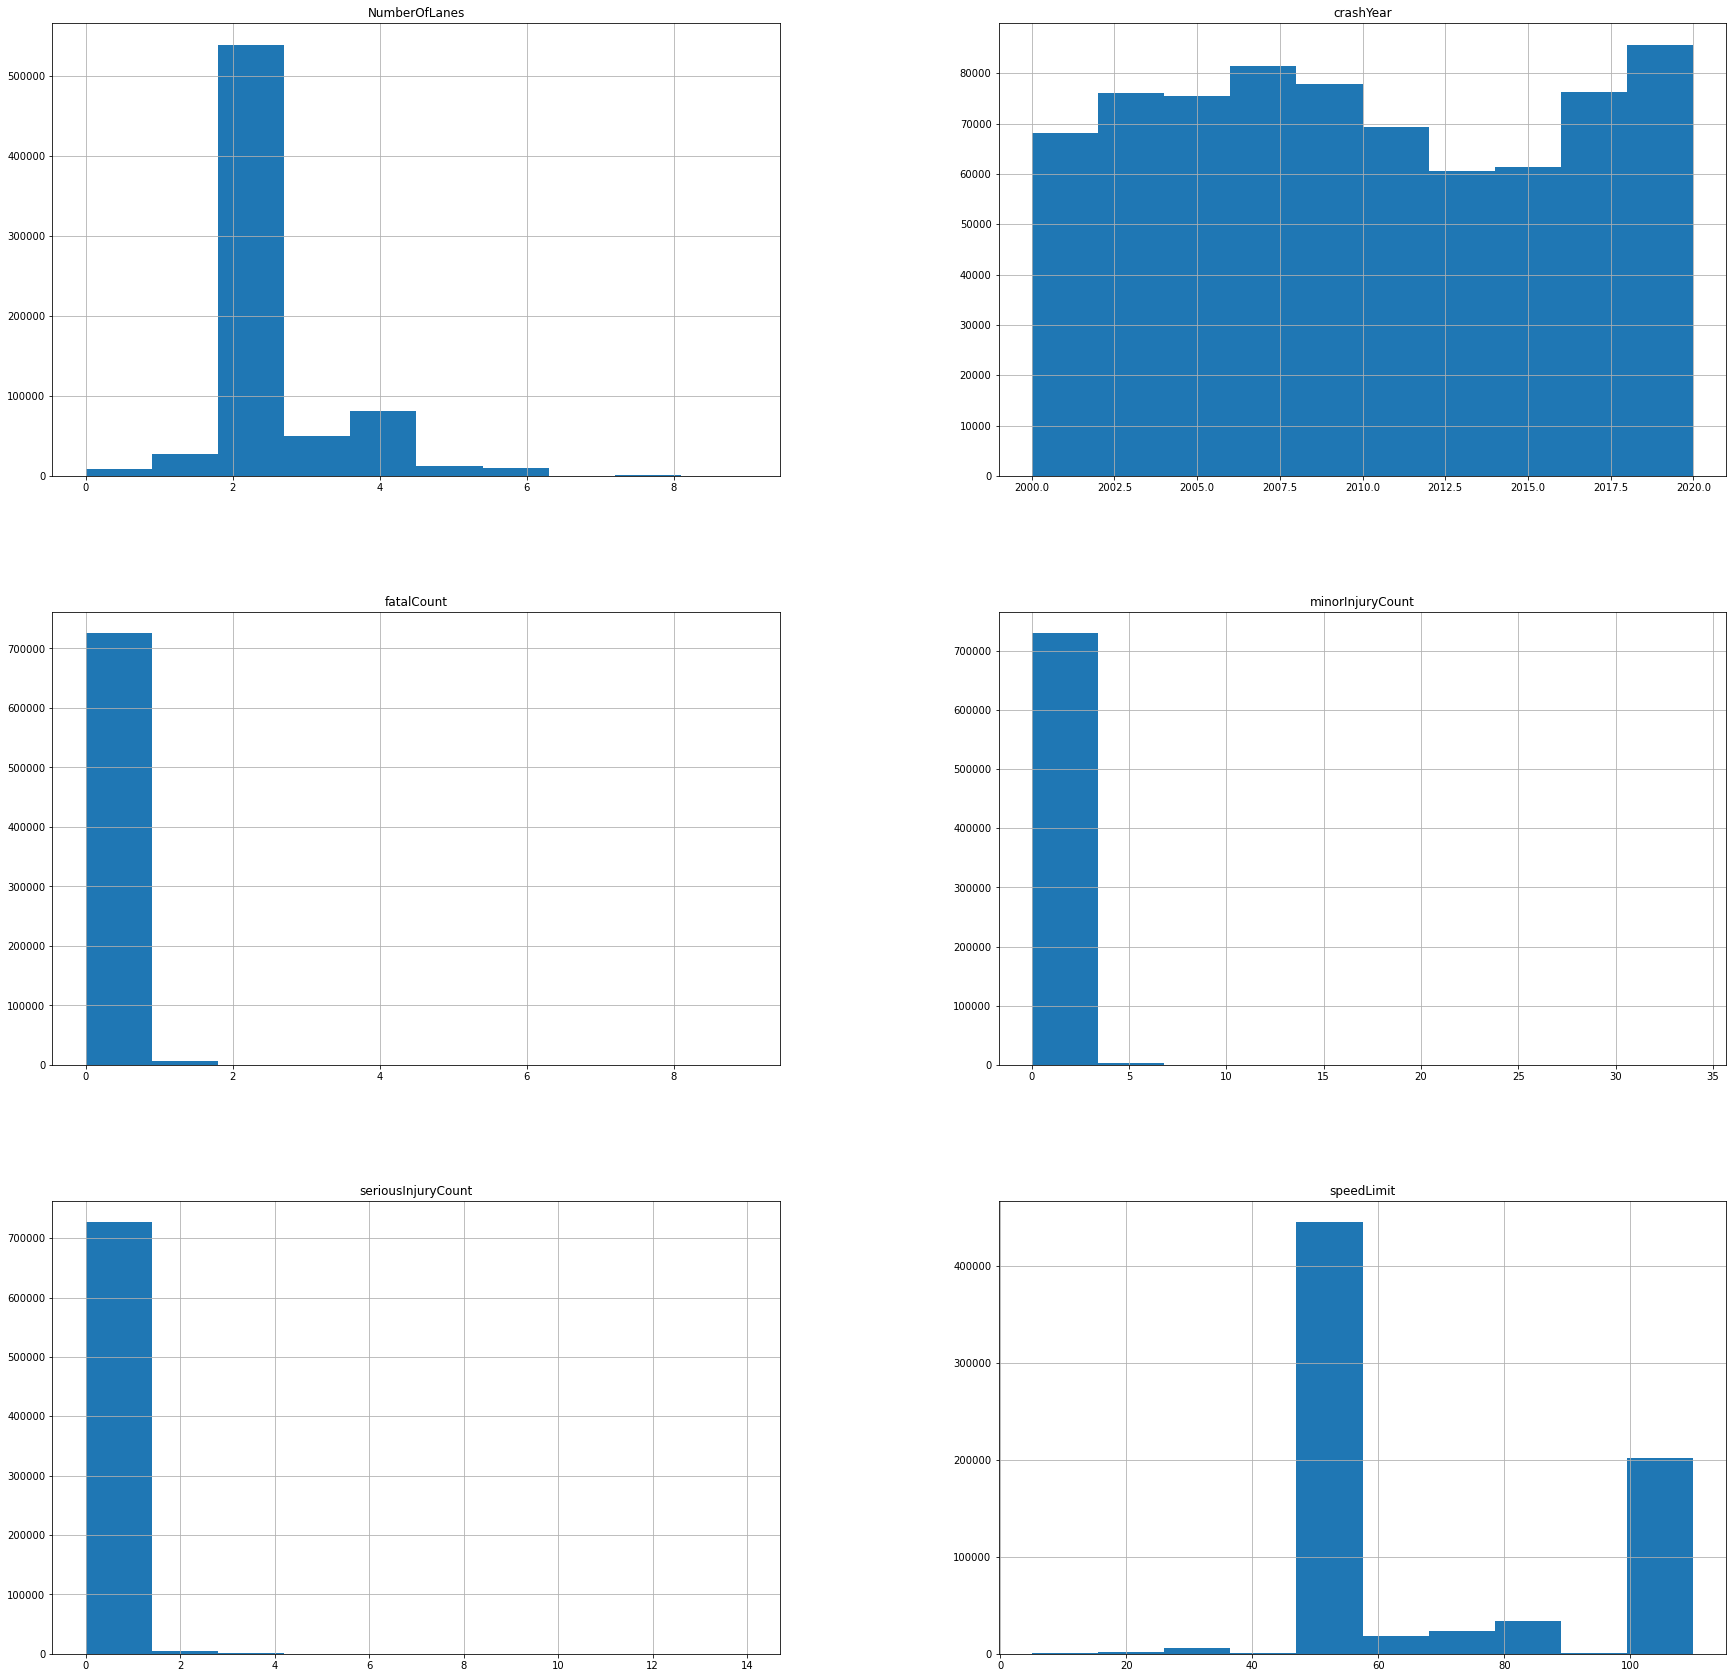

In [6]:
Crash_hist = Crash_df.hist(figsize=(30,30))
print(Crash_df.describe())

### The Correlation Matrix

This correlation matrix tells me if there are any correlations between two variables and if they would be useful to put together. Again these are only the columns with numerical values and not any of the columns that have descriptions.

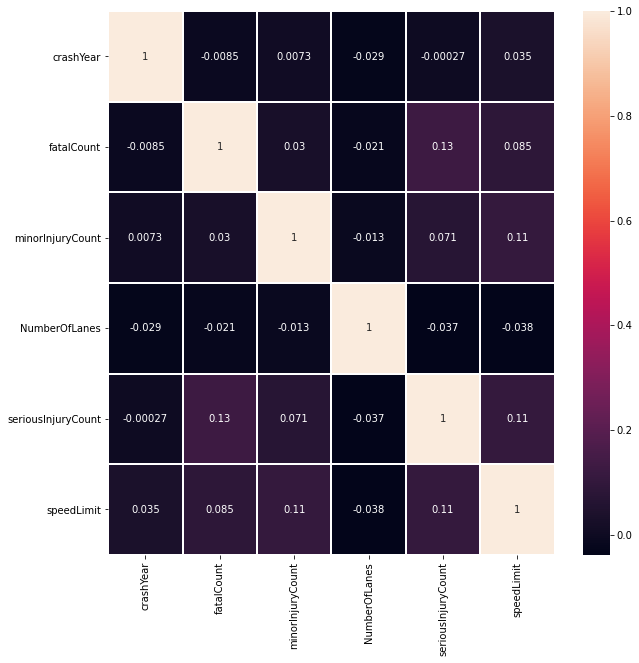

In [7]:
Correalation_Matrix = Crash_df.corr()
fig, ax = plt.subplots(figsize=(10,10))        
sns.heatmap(Correalation_Matrix, annot=True, linewidths=1.0, ax=ax)

### Scatterplot Matrix

This is giving me a series of plots that allow me to look for any correlation between the different variables. 

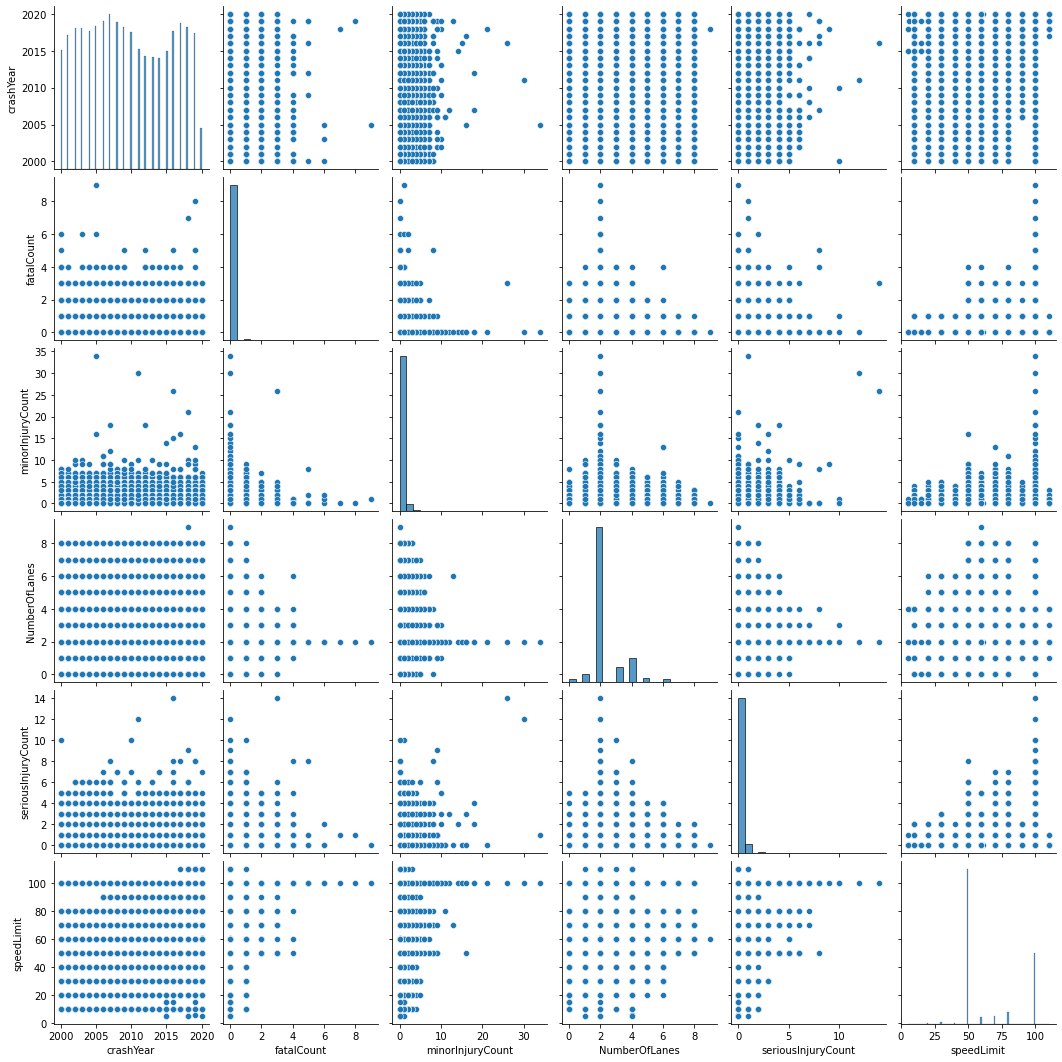

In [8]:
sns.pairplot(Crash_df)

### Bar plots 

Below I have multiple bar plots where the y axis is the fatal count frequency and a different variable for the x axis. 

The First bar polt is plotting the fatal car crashes per year and there is a lineplot below showing the trend of the barplot. The rest of the plots are having different variables plotted against the fatal count. Some have significat influence on the fatal car crashes and some do not have much of an effect at all. 

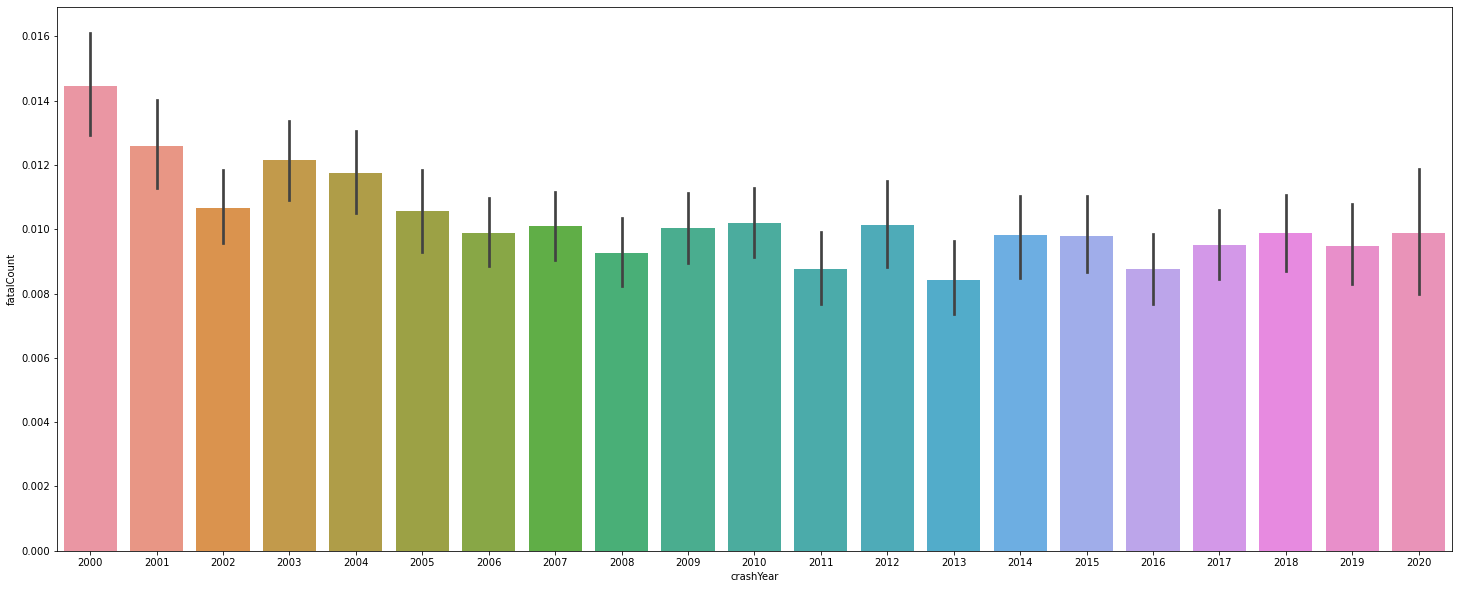

In [9]:
fig, ax = plt.subplots(figsize = (25, 10))

sns.barplot(x="crashYear", y="fatalCount",  data=Crash_df, ax=ax)

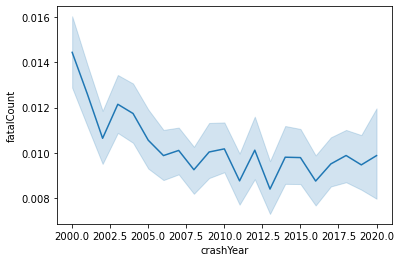

In [10]:
sns.lineplot(x="crashYear", y="fatalCount",data=Crash_df)

This second bar plot is showing the amount of fatal crashes in the different speed zones. The trends are expected where the faster speed limit areas have more fatal crashes. It seems that the majority of fatal crashes are in the 70 km/h to 110 kn/h. 

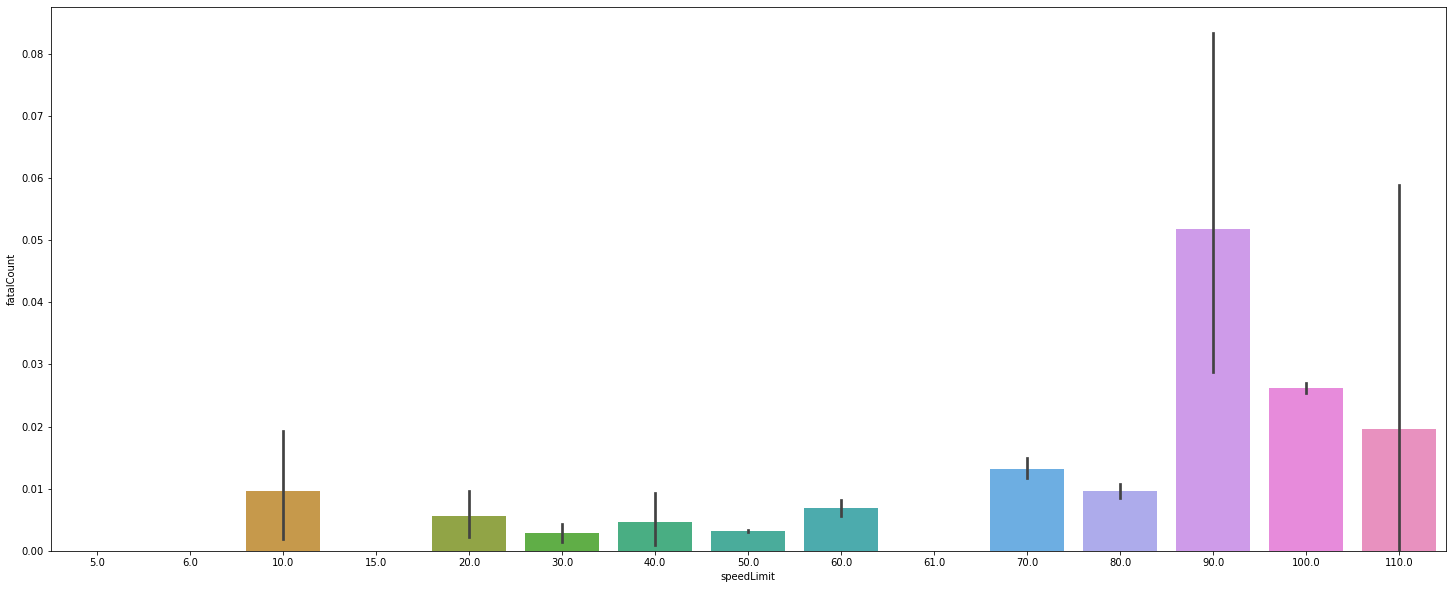

In [11]:
fig, ax = plt.subplots(figsize = (25, 10))
sns.barplot(x="speedLimit", y="fatalCount",  data=Crash_df, ax=ax)


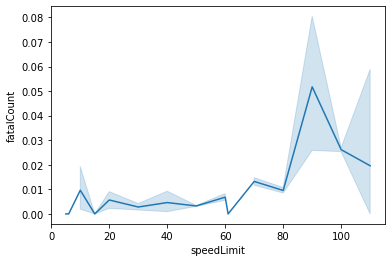

In [12]:
sns.lineplot(x="speedLimit", y="fatalCount",data=Crash_df)

There seems to be a higher frequency of fatal crashes within 1-3 lanes on the road.


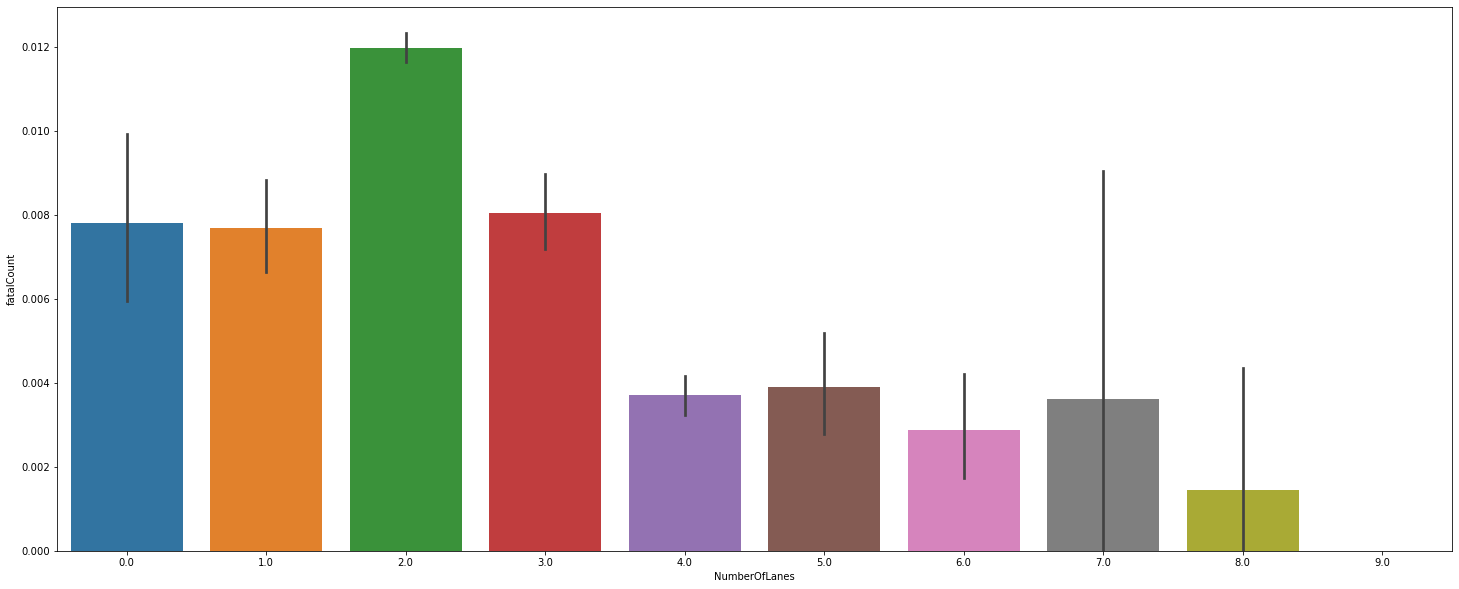

In [13]:
fig, ax = plt.subplots(figsize = (25, 10))
sns.barplot(x="NumberOfLanes", y="fatalCount",  data=Crash_df, ax=ax)
print("There seems to be a higher frequency of fatal crashes within 1-3 lanes on the road.")

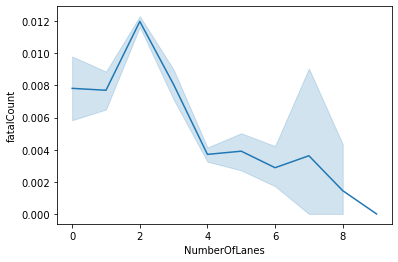

In [14]:
sns.lineplot(x="NumberOfLanes", y="fatalCount",data=Crash_df)

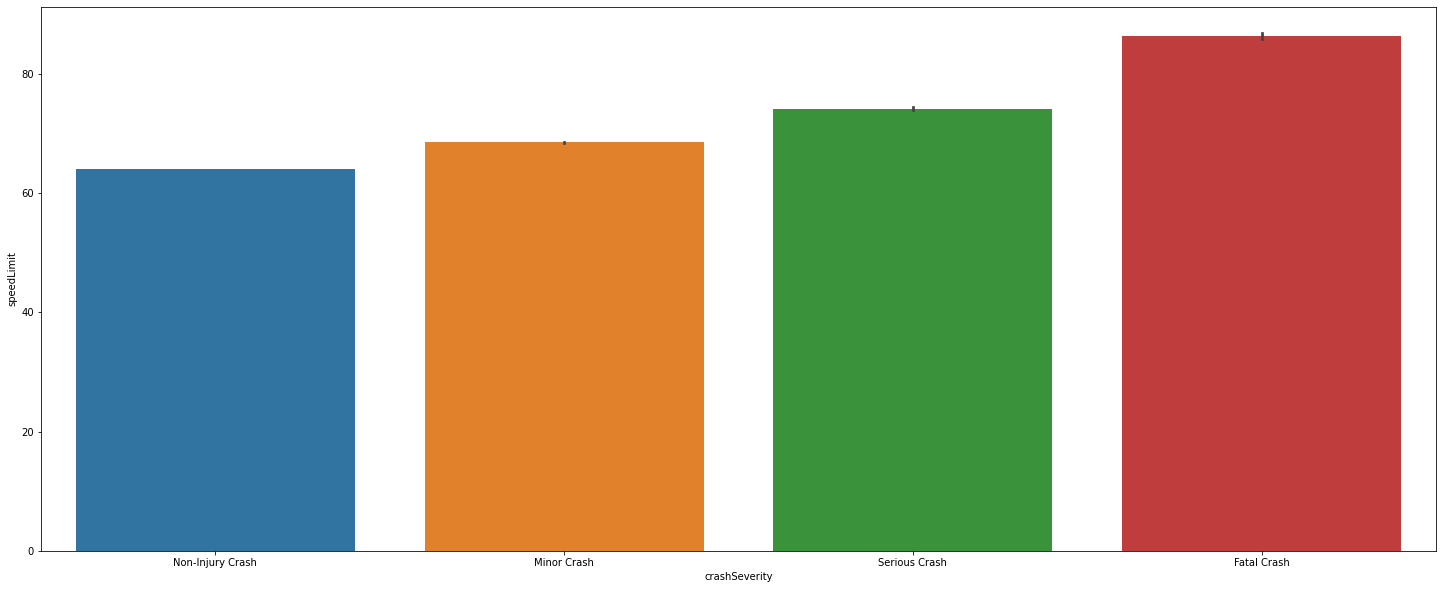

In [15]:
fig, ax = plt.subplots(figsize = (25, 10))
sns.barplot(x="crashSeverity", y="speedLimit",  data=Crash_df, ax=ax)

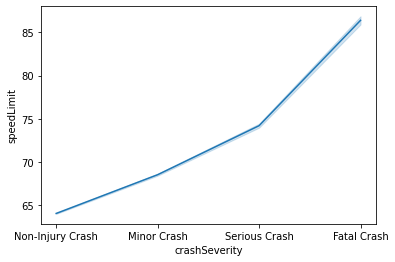

In [16]:
sns.lineplot(x="crashSeverity", y="speedLimit",data=Crash_df)

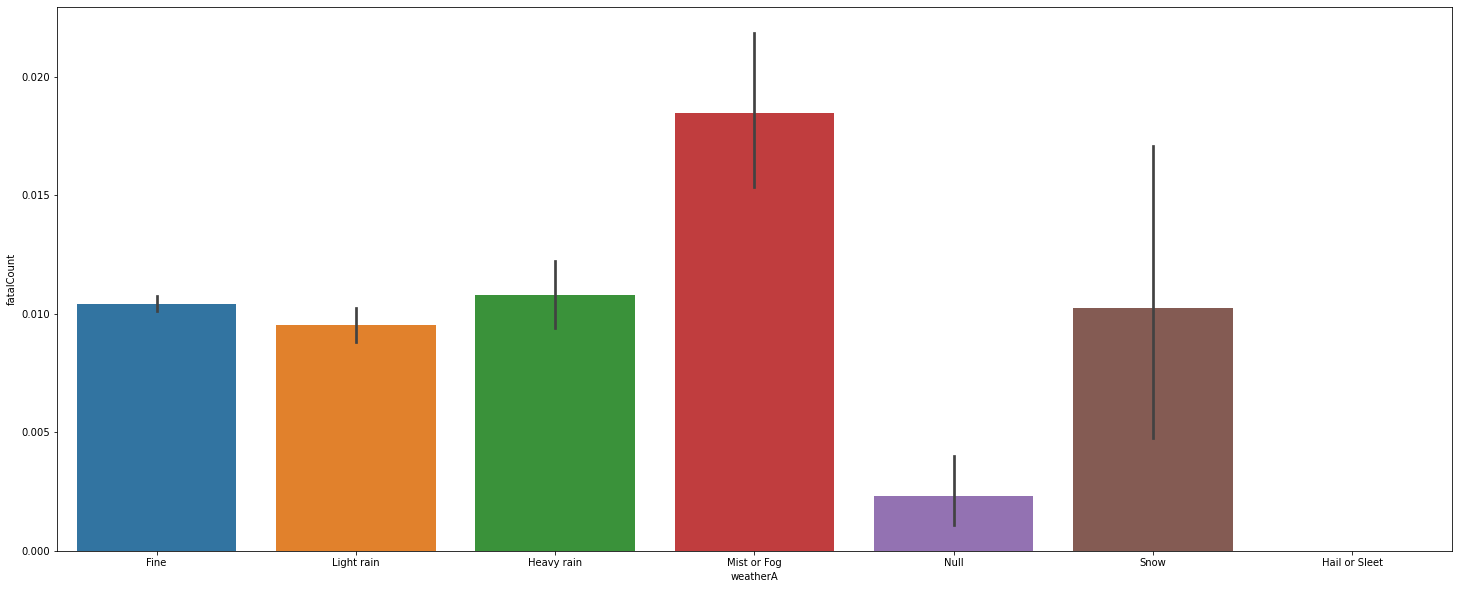

In [17]:
fig, ax = plt.subplots(figsize = (25, 10))
sns.barplot(x="weatherA", y="fatalCount",  data=Crash_df, ax=ax)

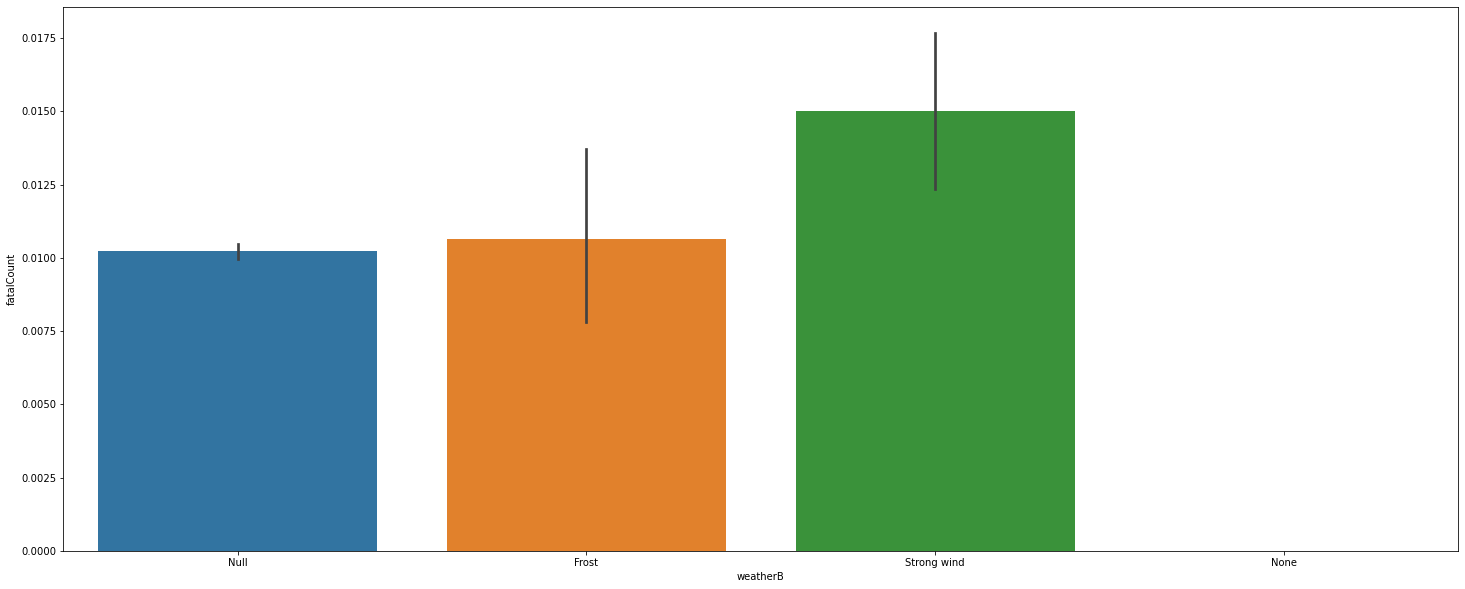

In [18]:
fig, ax = plt.subplots(figsize = (25, 10))
sns.barplot(x="weatherB", y="fatalCount",  data=Crash_df, ax=ax)

## Making a Model 

Here we are going to start making a model for the data. I am going to look at multiple factors that could cause a fatal crash. As seen above with the Bar plots there are some good contenders. 

Jeff Has the models for our project.

## Results and Conclusion

The results of the notebook indicate that there are many factors that go into the cause of a car crash. The variables that had the highest correlation for fatal crashes were: 
    - Speeds of 70 km/h to 110 km/hour
    - Roads that have between 1 and 3 lanes
    - Weather wise there was Mist or Fog, Snow, Heavy rain, and Strong winds.


All of the above factors are dangerous for driving, but a combination of one or more of the above would cause a driver to have a higher chance of a fatal crash. The amount of experience that a driver has varys for each of the crash scenarios. There are many factors to consider when looking at a scenario for a fatal crash. 

The models that I have done in this project are the OLS model, Logistic regression, KNN, SVC, and PCA. The model that I got the best accuracy with was the SVC model with the accuracy score being 99.9%. Since I changed a lot of the data to numerical values I was able to get a better look at what could influence a fatal crash.

## Citations

Crash Analysis System (CAS) Data. (2020, December 10). Retrieved December 12, 2020, from https://opendata-nzta.opendata.arcgis.com/datasets/crash-analysis-system-cas-data-1?geometry=26.021%2C-83.876%2C-36.557%2C61.403